In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784' , version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X,y =mnist['data'] , mnist['target']
X.shape


(70000, 784)

In [3]:
y.shape

(70000,)

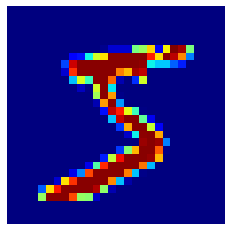

In [4]:
import matplotlib.pyplot as plt
dig = X[0]
dig_img=dig.reshape(28,28)
plt.imshow(dig_img , cmap = 'jet' , interpolation="nearest")
plt.axis('off')
plt.show()

In [5]:
y[0]

'5'

In [6]:
import numpy as np
y=y.astype(np.uint8)

In [7]:
X_train , X_test , y_train , y_test = X[:60000],X[60000:] , y[:60000] , y[60000:]

In [8]:
y_train5 =(y_train==5)
y_test5 =(y_test==5)


In [9]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
sgd.predict([dig])

array([ True])

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [12]:
skf=StratifiedKFold(n_splits = 3 , random_state = 42)
for train_index , test_index in skf.split(X_train , y_train5):
    clonef =clone(sgd)
    X_train_fold = X_train[train_index]
    X_test_fold = X_train[test_index]
    y_train_fold = y_train5[train_index]
    y_test_fold = y_train5[test_index]
    clonef.fit(X_train_fold,y_train_fold)
    y_pred = clonef.predict(X_test_fold)
    n_correct = sum(y_pred ==y_test_fold)
    print( n_correct / len(y_pred))


C:\Users\Taha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X_train, y_train5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [14]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self , X , y = None) :
        pass
    def predict(self , X) :
        return np.zeros((len(X) , 1) , dtype=bool)

In [15]:
never5 = Never5Classifier()

In [16]:
cross_val_score(never5 , X_train , y_train5 , cv = 3 , scoring ="accuracy")

array([0.91125, 0.90855, 0.90915])

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [19]:
confusion_matrix(y_train5, y_train5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score ,f1_score
precision_score(y_train5 , y_train_pred)

0.8370879772350012

In [21]:
recall_score(y_train5 , y_train_pred)

0.6511713705958311

In [22]:
f1_score(y_train5 , y_train_pred)

0.7325171197343846

In [23]:
y_scores = sgd.decision_function([dig])
y_scores

array([2164.22030239])

In [24]:
threshold = 0
y_dig_pred = (y_scores > threshold)
y_dig_pred

array([ True])

In [25]:
threshold = 8000
y_dig_pred = (y_scores > threshold)
y_dig_pred

array([False])

In [26]:
y_scores= cross_val_predict(sgd , X_train , y_train5 , cv = 3 , method = 'decision_function')

In [27]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train5 , y_scores)

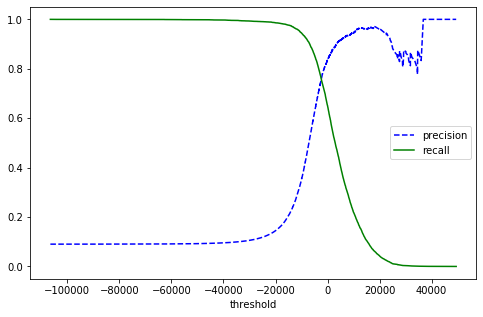

In [28]:
def plot_pre_rec_vs_thresh(precisions, recalls, thresholds) :
    plt.figure(figsize=(8,5))
    plt.plot(thresholds , precisions[:-1] , 'b--' , label = 'precision')
    plt.plot(thresholds , recalls[:-1] , 'g' , label = 'recall')
    plt.xlabel('threshold')
    plt.legend()
plot_pre_rec_vs_thresh(precisions, recalls, thresholds)
plt.show()

In [29]:
threshold90=thresholds[np.argmax(precisions>=.95)]
threshold90

10480.508645329957

In [30]:
y_train90 = (y_scores >= threshold90)


In [31]:
precision_score(y_train5 , y_train90)

0.9503367003367004

In [32]:
recall_score(y_train5 , y_train90)

0.20826415790444566

In [33]:
from sklearn.metrics import roc_curve


In [34]:
fpr,tpr , thresholds = roc_curve(y_train5 , y_scores)

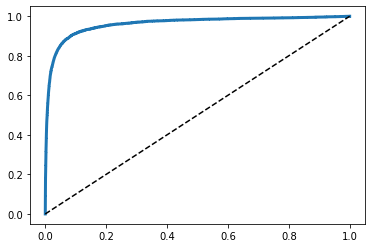

In [35]:
def plot_roc(fpr,tpr,label=None ) :
    plt.plot(fpr , tpr , linewidth=3 , label=label)
    plt.plot([0,1],[0,1], 'k--') 
plot_roc(fpr, tpr)
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train5 , y_scores)

0.9604938554008616

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 42)
y_proba=cross_val_predict(forest , X_train ,y_train5 , cv =3 , method = 'predict_proba')

In [38]:
y_scores_forest=y_proba[:,1]
fpr_forest , tpr_forest , threshold = roc_curve(y_train5 , y_scores_forest)

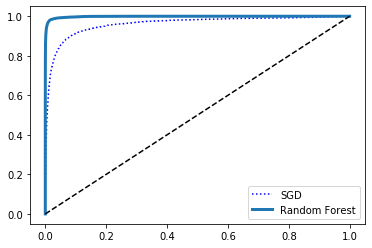

In [39]:
plt.plot(fpr , tpr , 'b:' , label='SGD')
plot_roc(fpr_forest , tpr_forest , label ='Random Forest')
plt.legend()
plt.show()

In [40]:
sgd.fit(X_train , y_train)
sgd.predict([dig])

array([3], dtype=uint8)

In [41]:
dig_scores=sgd.decision_function([dig])

In [42]:
np.argmax(dig_scores)

3

In [43]:
sgd.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [44]:
from sklearn.multiclass import OneVsOneClassifier

In [45]:
ovo = OneVsOneClassifier(SGDClassifier(random_state=42))

In [46]:
ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [47]:
ovo.predict([dig])

array([5], dtype=uint8)

In [48]:
len(ovo.estimators_)

45

In [49]:
forest.fit(X_train, y_train)
forest.predict([dig])

array([5], dtype=uint8)

In [50]:
forest.predict_proba([dig])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [51]:
cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled =scaler.fit_transform(X_train.astype(np.float64))

In [53]:
cross_val_score(sgd, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [54]:
y_train_pred=cross_val_predict(sgd , X_train_scaled  , y_train , cv = 3)
conf = confusion_matrix(y_train , y_train_pred)
conf

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

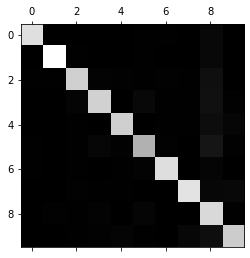

In [55]:
plt.matshow(conf , cmap ='gray')
plt.show()

In [56]:
row_sum=conf.sum(axis=1 , keepdims=True)
norm = conf/row_sum

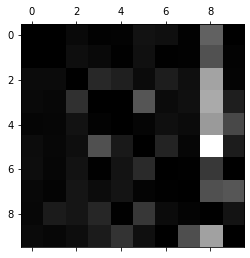

In [57]:
np.fill_diagonal(norm , 0)
plt.matshow(norm , cmap ='gray')
plt.show()

In [58]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn=KNeighborsClassifier()
knn.fit(X_train, y_multilabel)
knn.predict([dig])

array([[False,  True]])

In [59]:
y_train_knn_pred = cross_val_predict(knn ,X_train , y_multilabel , cv=3 )

In [60]:
f1_score(y_multilabel , y_train_knn_pred, average ='macro')

0.976410265560605